# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


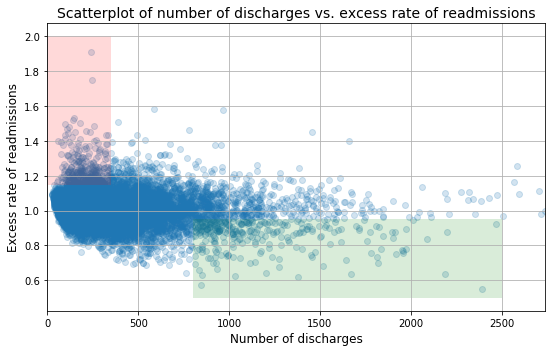

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [5]:
hospital_read_df 

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013
5,WESTERN MISSOURI MEDICAL CENTER,260097,MO,READM-30-HIP-KNEE-HRRP,141,NaN,1.5189,8.1,5.3,19.0,07/01/2010,06/30/2013
6,SAINT AGNES HOSPITAL,210011,MD,READM-30-HIP-KNEE-HRRP,390,NaN,1.5079,7.8,5.2,38.0,07/01/2010,06/30/2013
7,MERCY HOSPITAL JEFFERSON,260023,MO,READM-30-HIP-KNEE-HRRP,178,NaN,1.5019,9.2,6.1,24.0,07/01/2010,06/30/2013
8,ONSLOW MEMORIAL HOSPITAL,340042,NC,READM-30-HIP-KNEE-HRRP,98,NaN,1.4953,7.9,5.3,15.0,07/01/2010,06/30/2013
9,FAUQUIER HOSPITAL,490023,VA,READM-30-HIP-KNEE-HRRP,256,NaN,1.4844,7.4,5.0,26.0,07/01/2010,06/30/2013


****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
#check stat
df = clean_hospital_read_df
df = df.iloc[81:-3,[4,6]]
df.columns = ['dis', 'readmission']
small = df[df.dis < 100]
ratio = len(small[small.readmission > 1])/len(small)
print(ratio)
big = df[df.dis >1000]
ratiob = len(big[big.readmission > 1])/len(big)
print(ratiob)

0.6321548821548821
0.44565217391304346


In [7]:
# I do not agree with recommendations. First, correlation does not suggest causal effect between two factors. It might be true
# that there is a negetive relationship between number of discharges and excess readmission rate, but we cannot presume that 
# increasing in number of discharges will lead to drop in excess readmission rate. Futher investigation need to be done to 
# give such the recommedations

In [8]:
# H0 the mean of small hos is equaled to big hos 
# Ha otherwise 
small = df.readmission[df.dis <= 300]
big = df.readmission[df.dis > 1000]
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1)-np.mean(data_2)
    return diff
diff = diff_of_means(small,big)
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_sample = np.random.choice(df.readmission, size=len(df.readmission))
    bs_replicates[i] = diff_of_means(bs_sample[:len(small)],
                                     bs_sample[len(small):])
# Compute and print p-value: p
p = np.sum(bs_replicates >= diff) / 10000
print('p-value =', p)
#reject Ho
#our test suggests that there is a difference in excess readmission rate
interval = np.percentile(bs_replicates,[0.5,99.5])
print('interval: {}'.format(interval))

p-value = 0.0
interval: [-0.0042669  0.0043735]


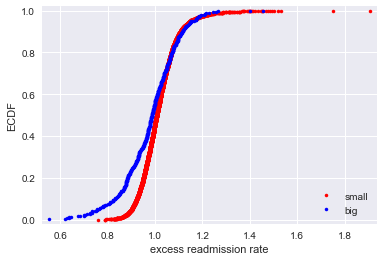

In [9]:
# try to do it graphically 
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y
sns.set()
x_1, y_1 = ecdf(small)
x_2, y_2 = ecdf(big)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')
plt.margins(0.02)
_ = plt.xlabel('excess readmission rate')
_ = plt.ylabel('ECDF')
_ = plt.legend(('small', 'big'), loc='lower right')
plt.show()
# the figure illustrates the difference in excess readmission rate 

In [10]:
# apply T-test since we dont know the distribution of the data
from scipy import stats
diff_mean_results = stats.ttest_ind(small,big,equal_var = False)
print(diff_mean_results)
#reject Ho at 1 percent confidence interval 
#T-test also suggests the same result as bs method. 

Ttest_indResult(statistic=6.212761793968204, pvalue=1.1092302172289456e-09)


In [12]:
#testing correlation between dis and readmission variable 
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)
    # Return entry [0,1]
    return corr_mat[0,1]
r  = pearson_r(df.dis,df.readmission)
def draw_bs_pairs_corr(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""
    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))
    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_rebs = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x.iloc[bs_inds], y.iloc[bs_inds]
        bs_rebs[i] = pearson_r(bs_x,bs_y)
    return bs_rebs
bs_corr_reps = draw_bs_pairs_corr(df.dis,df.readmission, 10000)
p = np.sum(bs_corr_reps >= r) / 10000
print('p-value =', p)
#cannot reject Ho, our test suggests that the negative correlation is not statistically significant

p-value = 0.4931


In [11]:
#testing liner regression 
a, b = np.polyfit(df.dis,df.readmission,1)
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""
    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))
    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x.iloc[bs_inds], y.iloc[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(list(bs_x),list(bs_y),1)
    return bs_slope_reps, bs_intercept_reps
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(df.dis,df.readmission, 10000)
p = np.sum(bs_slope_reps >= a) / 10000
print('p-value =', p)
p_i = np.sum(bs_intercept_reps >= b) / 10000
print('p-value =', p_i)
# cannot reject Ho, our test suggests that the negative correlation is not statistically significant

p-value = 0.5
p-value = 0.5021


slope = -2.8565052943821946e-05 excess readmission rate / number of discharges
intercept = 1.0179475579544202 excess readmission rate


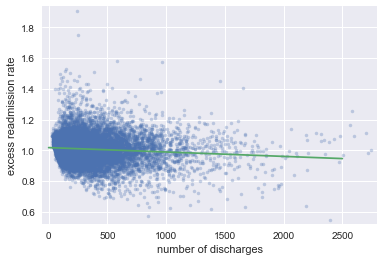

In [13]:
#plotting in the linear regresion style which has slope and intercept. these parameters can tell us quantitatively  
#the effect of number of discharges on excessreadmission rate, while scartter plot just give a broad trend of the relationship    
_ = plt.plot(df.dis, df.readmission, marker='.', linestyle='none', alpha = 0.3)
plt.margins(0.02)
_ = plt.xlabel('number of discharges')
_ = plt.ylabel('excess readmission rate')
a, b = np.polyfit(df.dis,df.readmission,1)
print('slope =', a, 'excess readmission rate / number of discharges')
print('intercept =', b, 'excess readmission rate')
x = np.array([0,2500])
y = (a * x) + b
_ = plt.plot(x, y, )
plt.show()